<a href="https://colab.research.google.com/github/MiguelAngel-ht/Notas-Introduccion-a-la-IA/blob/main/08-Red-Neuronal-de-Clasificaci%C3%B3n/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Importar datos de dígitos escritos a mano en imágenes de 28x28
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# Información de los datos
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incompleteLG4LJ9',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [27]:
# Separar en datos de entrenamiento y prueba
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

print('Datos de entrenamiento:', len(datos_entrenamiento))
print('Datos de prueba:', len(datos_pruebas))

Datos de entrenamiento: 60000
Datos de prueba: 10000


In [5]:
nombres_clases = metadatos.features["label"].names
nombres_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
# Normalizacion
# 0-255 1 byte
# Transformar 0-255 0-1 (0=0, 255=1, 127=.5)

# Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)  # pasar a flotantes los datos
  imagenes = imagenes/255                   # normalizar de 0-1
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [7]:
# Para mostrar las imágenes
import matplotlib.pyplot as plt

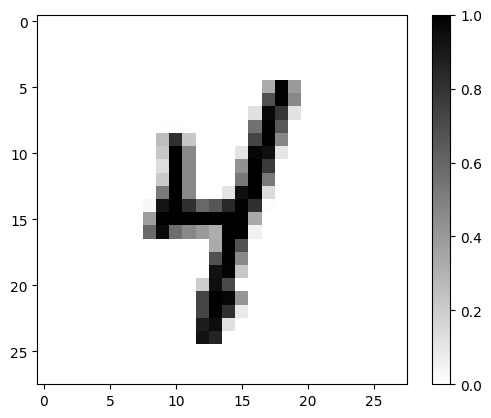

tf.Tensor(4, shape=(), dtype=int64)


In [10]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print(etiqueta)

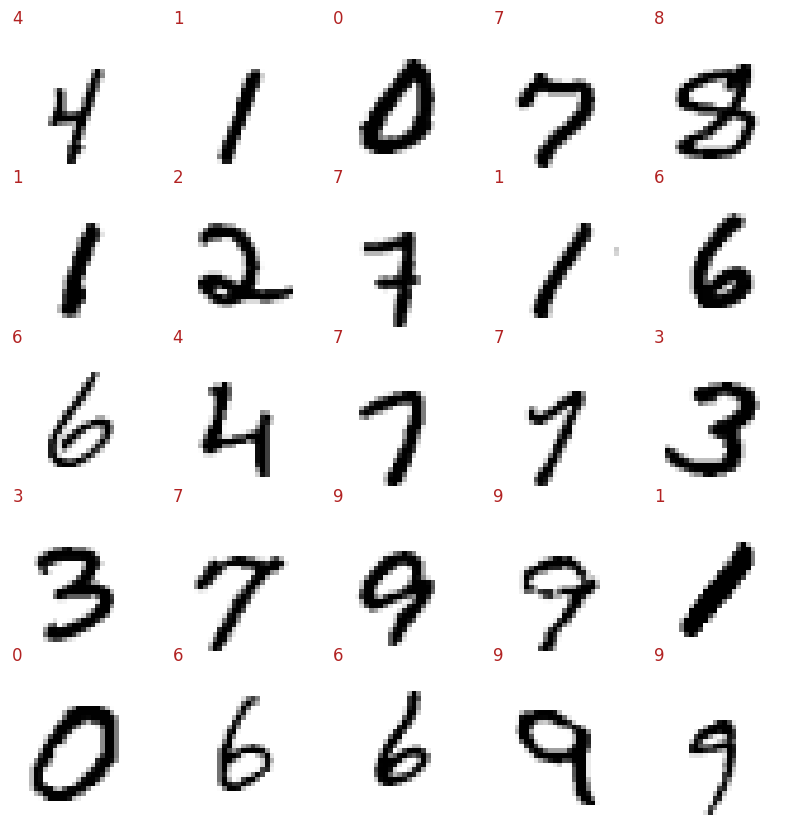

In [16]:
# Mostrar varios
plt.figure(figsize=(10, 10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.axis('off')      # Elimina las medidas en los ejes
    plt.text(0, -5, etiqueta.numpy(), color='firebrick', fontsize=12)  # Agrega la etiqueta como texto en rojo

plt.show()

In [17]:
# Definir Modelo
modelo = tf.keras.Sequential([
    #784 datos de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    # # # Capa oculta
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
# Crear modelo

modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [20]:
# Datos de Optimización

TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [21]:
import math

#Entrenar modelo

entrnamiento = modelo.fit(
    datos_entrenamiento, epochs=5,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.2913 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1344 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1022 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9794


1/1 [==============================] - 0s 39ms/step


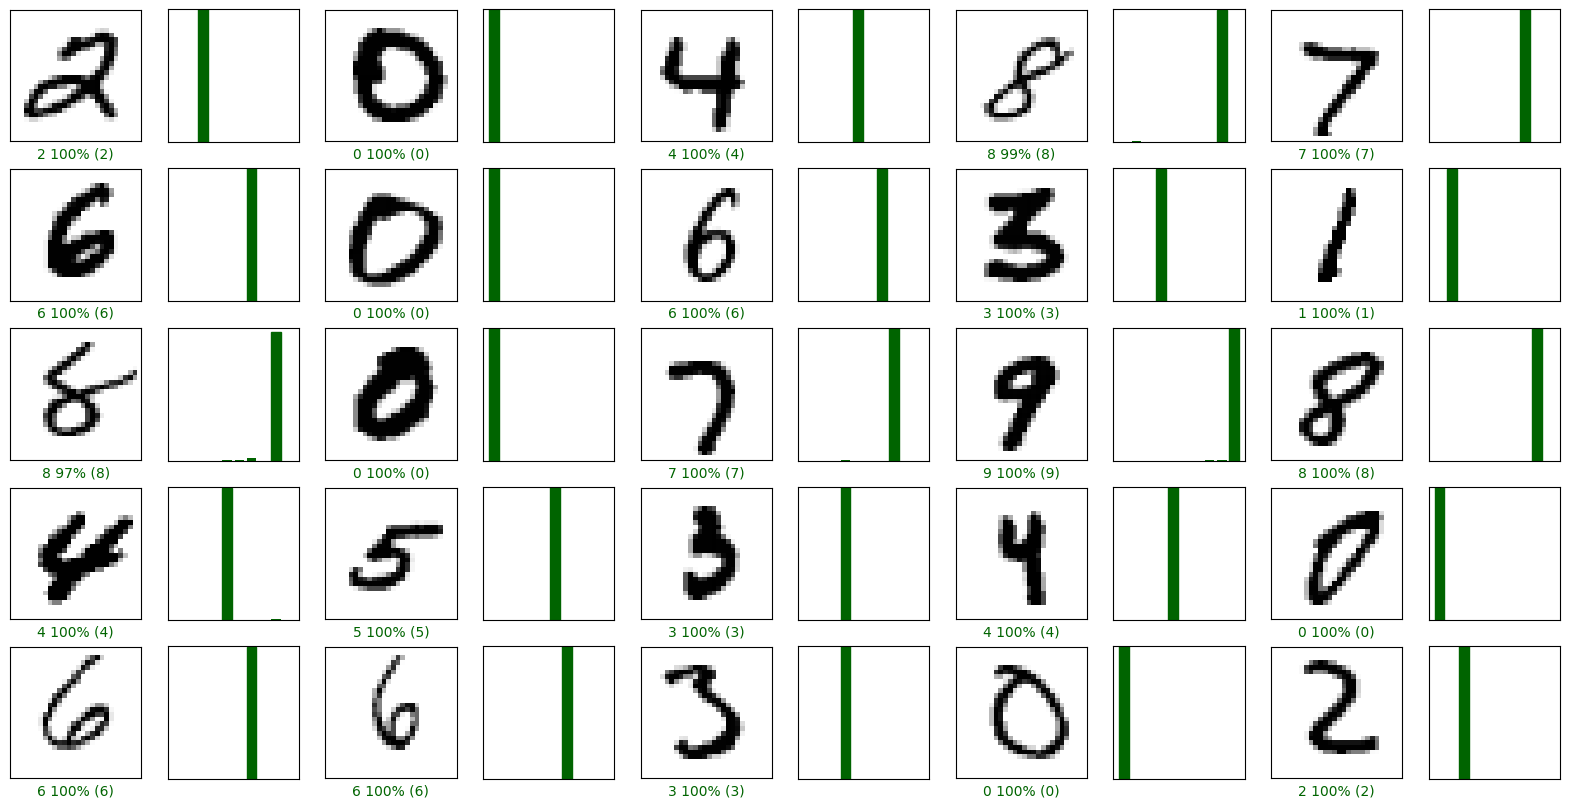

In [25]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
      color = 'darkgreen'
    else:
      color = 'firebrick'

    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                  100*np.max(arr_predicciones),
                                  nombres_clases[etiqueta_real]),
                                  color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="darkgreen")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('firebrick')
    grafica[etiqueta_real].set_color('darkgreen')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)